**GitHub Repository-** **https://github.com/anweshabose/Heart_Disease_Prediction**

# **ANTICIPATING YOUR HEART HEALTH**


![](https://cardiovascularbusiness.com/sites/default/files/styles/top_stories/public/2021-05/iStock-1141130339.jpg.webp?itok=tv2qWaDz)

### Take care of your Heart because Blessings are not valued till they are gone.

# Introduction

In this busy world, we often forget to spend time with ouselves. We often neglect our Health. Out of all works, it is very important to keep ourselves healthy. So, we have made an application by which you can check the condition of your Heart. If Prediction says that your heart is in Danger, then please do not delay, do check up immediately. By this model, you will not have to spend a single penny to check your heart health. You just have to put some efforts to provide few necessary details about your heart and health and there you go for the Result.

Just for 5-Minutes, forget the world, forget your work and be selfish about Youself, about Your Health, about Your Heart. Be Health consious.

In this project we have trained the data with Four different Models and the best model will be used to predict if there is any Heart Disease or not based on your provided information. So, there is 99.99% chance that it will provide the accurate result. We will take a look at real world data and use machine learning techniques to build the model that can Predict Heart Disease.


# Project Outline

**Steps that we follow:**

- Data Description.
- Installing and importing all the required libraries.
- Importing the csv file.
- Exploratory Data Analysis.
- Feature Scaling.
- Prepare the Dataset for ML Training.
- Model 1: Logistic Regression.
- Model 2: KNN Classifier
- Model 3: Decision Tree Classifier
- Model 4: Random Forest Classifier.
- Evaluate the Best Model.
- Make Predictions on New Data.
- Summary

# Data Description

**Here are the complete names of the columns of heart disease prediction dataset:**

- `age` – Age in years
- `sex` – Gender (1 = male, 0 = female)
- `cp` – Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- `trestbps` – Resting blood pressure (in mm Hg)
- `chol` – Serum cholesterol (in mg/dl)
- `fbs` – Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- `restecg` – Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = probable left ventricular hypertrophy)
- `thalach` – Maximum heart rate achieved
- `exang` – Exercise-induced angina (1 = yes, 0 = no)
- `oldpeak` – ST depression induced by exercise relative to rest
- `slope` – Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- `ca` – Number of major vessels (0–3) colored by fluoroscopy
- `thal` – Thalassemia (1 = normal, 3 = fixed defect, 6 = reversible defect)
- `target` – Presence of heart disease (1 = disease, 0 = no disease)

## Installing and importing all the libraries

In [ ]:
!pip install numpy 
!pip install pandas 
!pip install matplotlib 
!pip install seaborn 
!pip install scikit-learn

In [3]:
# Import Required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') 

# Importing the CSV file

In [4]:
# Load Dataset
df = pd.read_csv('heart_disease.csv')

# Exploratory Data Analysis
### Exploratory Data Analysis (EDA) is the process of examining, summarizing, and visualizing datasets to understand patterns, relationships, and anomalies before applying machine learning models.

In [5]:
# Display the first five rows
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.shape

(1025, 14)

In [82]:
# View column details
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [83]:
# Summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [86]:
# Check missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


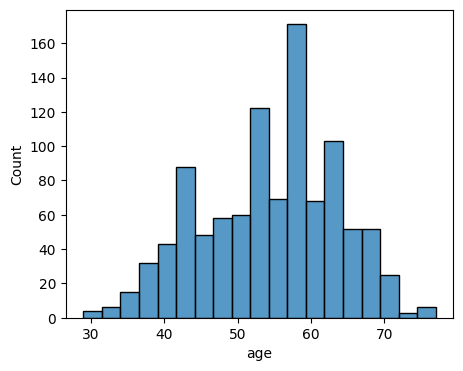

In [ ]:
# Univariate Analysis (Numerical Features)
# HISTOGRAM ON AGE
plt.figure(figsize=(5, 4))
sns.histplot(df['age'])
plt.show()

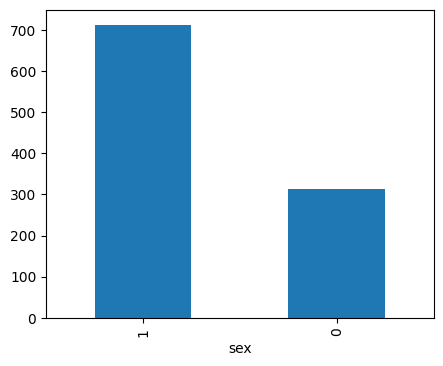

In [ ]:
# Univariate Analysis (Categorical Features)
# BAR CHART ON SEX
plt.figure(figsize=(5, 4))
df['sex'].value_counts().plot(kind='bar')
plt.show()

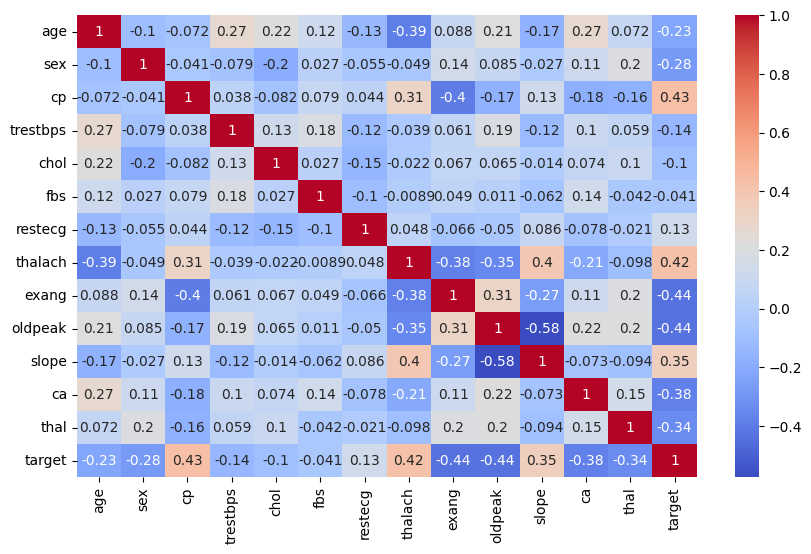

In [94]:
# Bivariate Analysis
# HEATMAP FOR CORRELATIONS
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

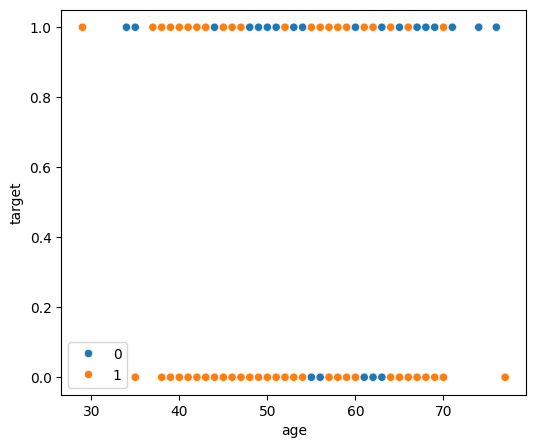

In [98]:
# Bivariate Analysis
# SCATTERPLOT ON AGE TARGET(HEART DISEASE)
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['age'], y=df['target'], hue=df['sex'])
plt.legend()
plt.show()

# Feature Scaling
### Feature Scaling is a technique used in machine learning to normalize or standardize numerical data so that features are on a similar scale.

In [10]:
# Standardizes the features by subtracting the mean and dividing by the standard deviation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))  # Target variable should be excluded from scaling

In [11]:
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])  # X: Independent variable
y = df['target']  # y: Dependent variable

# Prepare the Dataset for ML Training
### Preparing the dataset is essential because we don't have to train the entire dataset. Maximum part of the dataset will be used for training and remaining part will be used for testing the accuracy. 
### If Accuracy is not met then we have to tune the model or else we have to change the algorithm.

In [12]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
X_train.shape

(820, 13)

In [14]:
X_test.shape

(205, 13)

# Model 1: Logistic Regression

In [109]:
# Model Training: Here, we are training the model with X_train and y_train
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [110]:
# Predicting the trained-model on X_test to get the predicted values of y.
logistic_y_preds = log_model.predict(X_test)

In [111]:
# Logistic accuracy score: checking whether predicted values of y is equal to Actual values of y.
log_accuracy = accuracy_score(y_test, logistic_y_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

Logistic Regression Accuracy: 0.81


### Accuracy: 0.81 means there is 81% match between Actual values of y and Predicted values of y.

# Model 2: KNN Classifier

In [112]:
# Model Training: Here, we are training the model with X_train and y_train
KNN_model = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',n_neighbors=11,weights='uniform')
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [113]:
# Predicting the trained-model on X_test to get the predicted values of y.
KNN_y_preds=KNN_model.predict(X_test)

In [114]:
# KNN accuracy score: checking whether predicted values of y is equal to Actual values of y.
KNN_accuracy = accuracy_score(y_test, KNN_y_preds)
print(f"KNN Accuracy: {KNN_accuracy:.2f}")

KNN Accuracy: 0.84


### Accuracy: 0.84 means there is 84% match between Actual values of y and Predicted values of y.

# Model 3: Decision Tree Classifier

In [115]:
# Model Training: Here, we are training the model with X_train and y_train
Decision_Tree_model = DecisionTreeClassifier(random_state=42)
Decision_Tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [116]:
# Predicting the trained-model on X_test to get the predicted values of y.
Decision_Tree_y_preds = Decision_Tree_model.predict(X_test)

In [117]:
# Decision_Tree accuracy score: checking whether predicted values of y is equal to Actual values of y.
Decision_Tree_accuracy = accuracy_score(y_test, Decision_Tree_y_preds)
print(f"Decision_Tree Accuracy: {Decision_Tree_accuracy:.2f}")

Decision_Tree Accuracy: 0.99


### Accuracy: 0.99 means there is 99% match between Actual values of y and Predicted values of y.

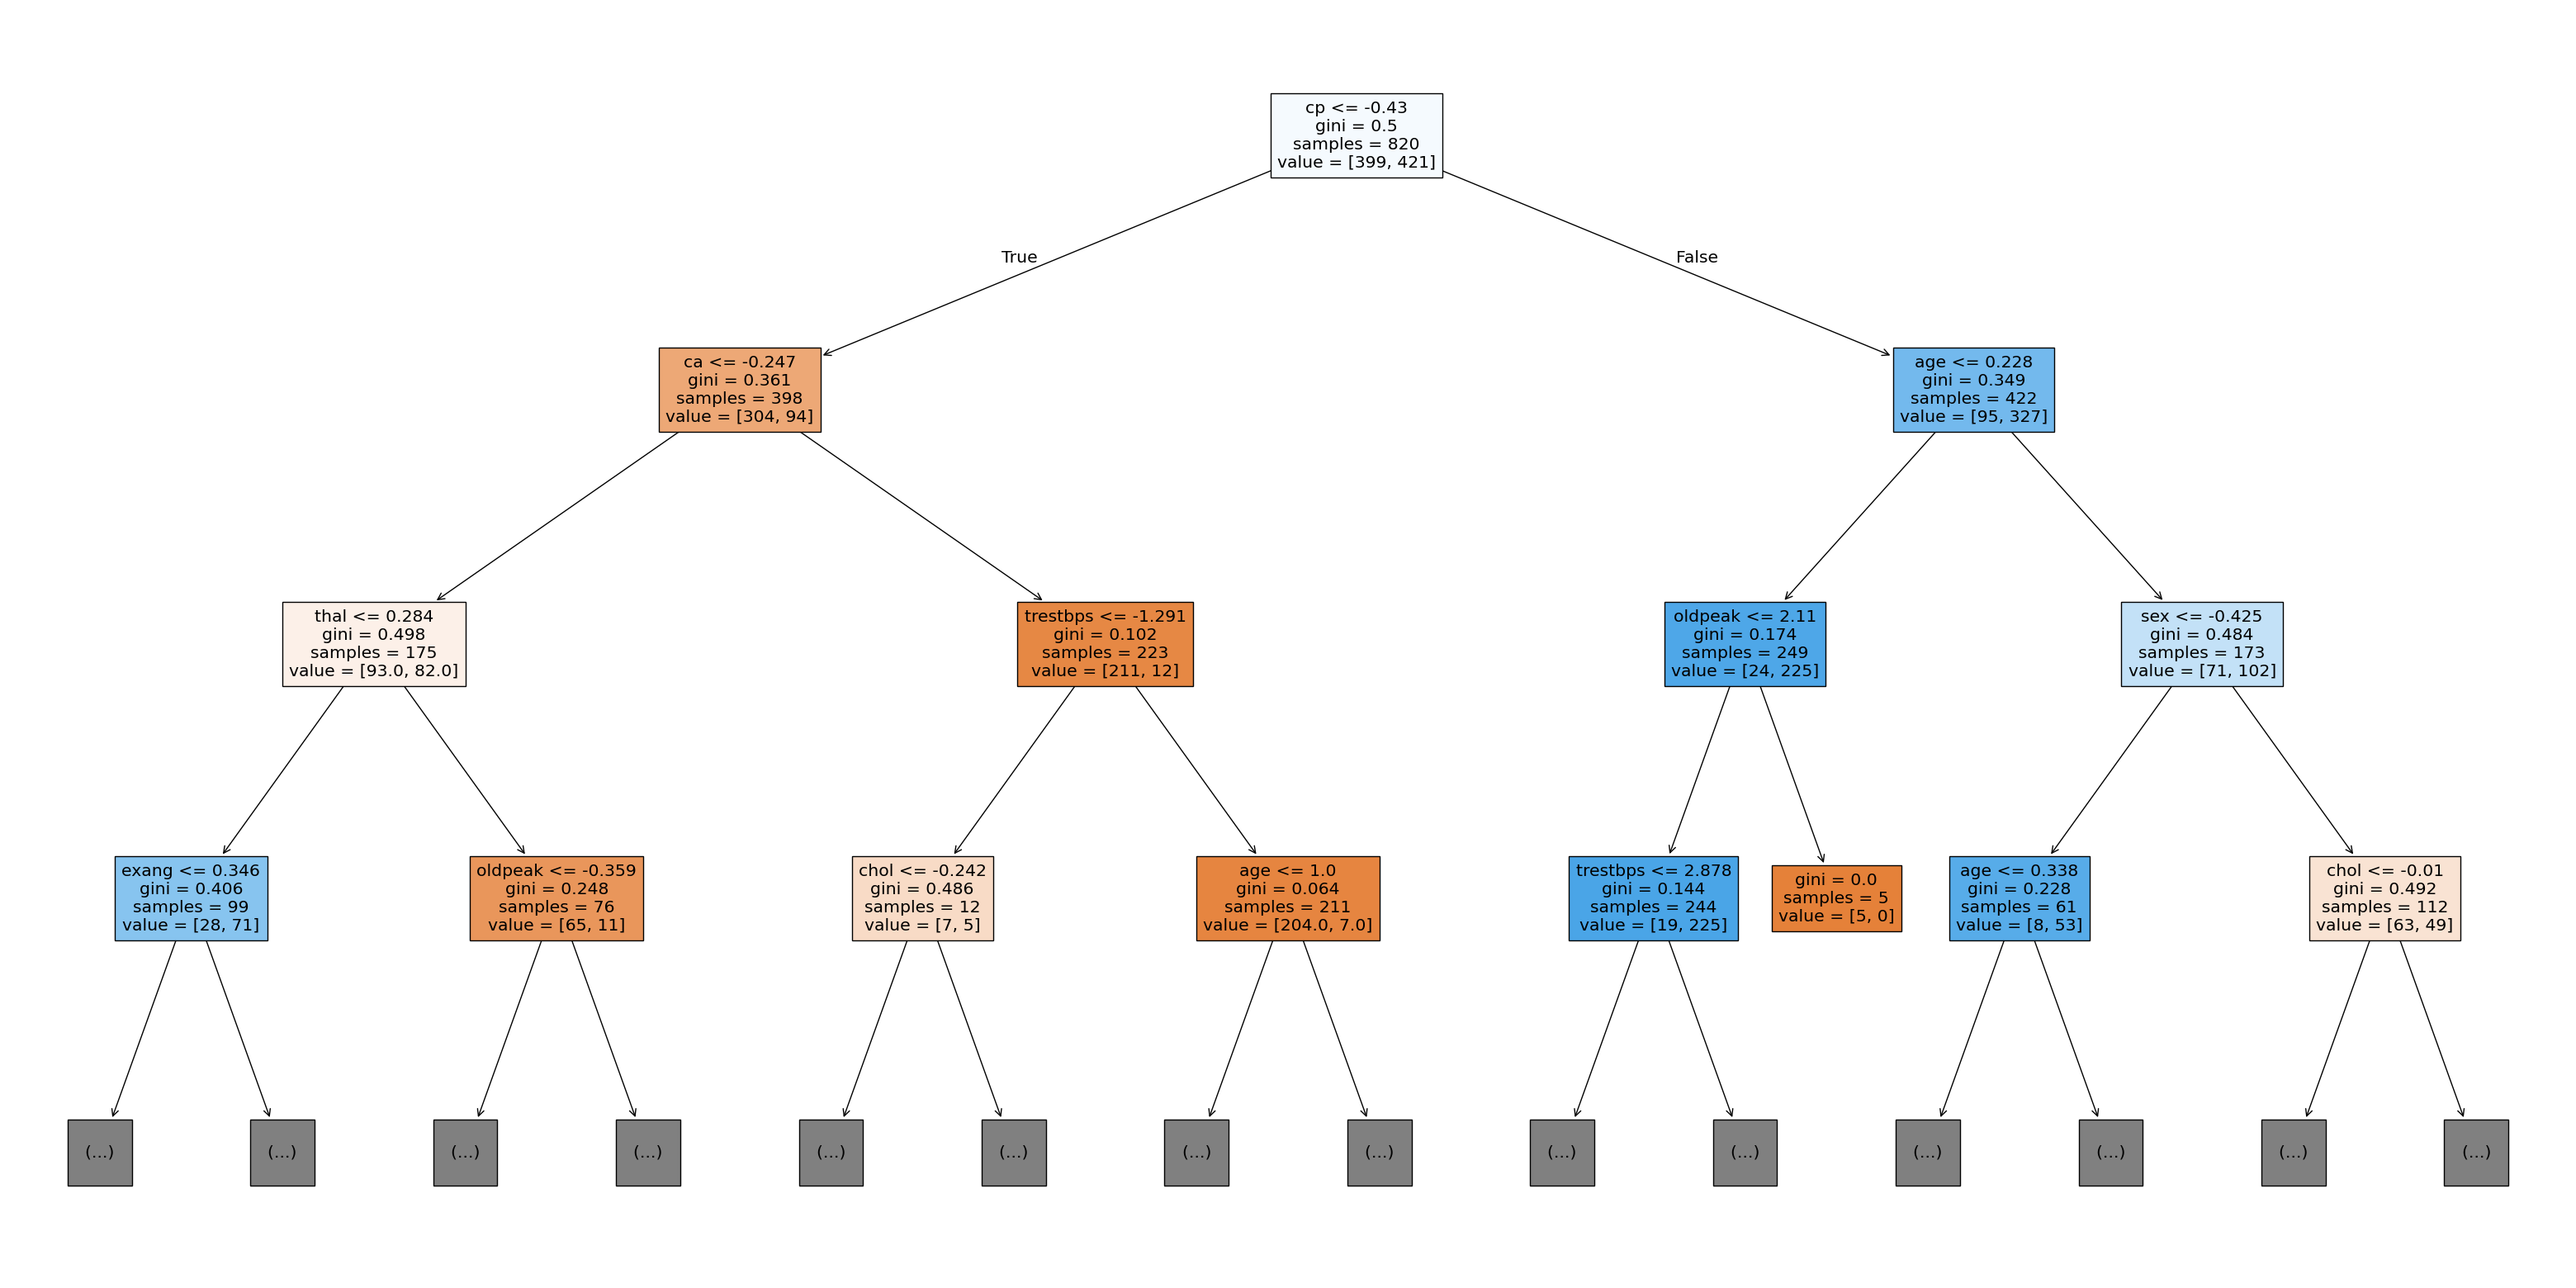

In [118]:
# Visualising the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(Decision_Tree_model, feature_names=X_train.columns, max_depth=3, filled=True)
plt.show()

# Model 4: Random Forest Classifier

In [122]:
# Model Training: Here, we are training the model with X_train and y_train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [123]:
# Predicting the trained-model on X_test to get the predicted values of y.
rf_y_preds = rf_model.predict(X_test)

In [124]:
# Random Forest accuracy score: checking whether predicted values of y is equal to Actual values of y.
rf_accuracy = accuracy_score(y_test, rf_y_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 1.00


### Accuracy: 1.00 means there is 100% match between Actual values of y and Predicted values of y.

## Evaluate the Best Model

In [125]:
print("Accuracy Score of Logistic Regression", log_accuracy)
print("Accuracy Score of KNN", KNN_accuracy)
print("Accuracy Score of Decision Tree Classifier", Decision_Tree_accuracy)
print("Accuracy Score of Random Forest Classifier", rf_accuracy)

Accuracy Score of Logistic Regression 0.8097560975609757
Accuracy Score of KNN 0.8439024390243902
Accuracy Score of Decision Tree Classifier 0.9853658536585366
Accuracy Score of Random Forest Classifier 1.0


In [128]:
if rf_accuracy > log_accuracy and rf_accuracy > KNN_accuracy and rf_accuracy > Decision_Tree_accuracy:
    print(" Random Forest Classifier is the Best Model" )
    best_model = rf_model
elif Decision_Tree_accuracy > log_accuracy and Decision_Tree_accuracy > KNN_accuracy and Decision_Tree_accuracy > rf_accuracy:
    print("Decision Tree is the Best Model")
    best_model = Decision_Tree_model
elif KNN_accuracy > log_accuracy and KNN_accuracy > Decision_Tree_accuracy and KNN_accuracy > rf_accuracy:
    print("KNN is the Best Model")
    best_model = KNN_model
else:
    print("Logistic Regression is the Best Model")
    best_model = log_model

 Random Forest Classifier is the Best Model


In [129]:
if rf_accuracy > log_accuracy and rf_accuracy > KNN_accuracy and rf_accuracy > Decision_Tree_accuracy:
    best_preds = rf_y_preds
elif Decision_Tree_accuracy > log_accuracy and Decision_Tree_accuracy > KNN_accuracy and Decision_Tree_accuracy > rf_accuracy:
    best_preds = Decision_Tree_y_preds
elif KNN_accuracy > log_accuracy and KNN_accuracy > Decision_Tree_accuracy and KNN_accuracy > rf_accuracy:
    best_preds = KNN_y_preds
else:
    best_preds = logistic_y_preds

In [130]:
print("\nBest Model Metrics:")
print()
print("Accuracy Score:", accuracy_score(y_test, best_preds))
print("Classification Report:\n", classification_report(y_test, best_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_preds))


Best Model Metrics:

Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
 [[100   0]
 [  0 105]]


***Confusion Matrix***:

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

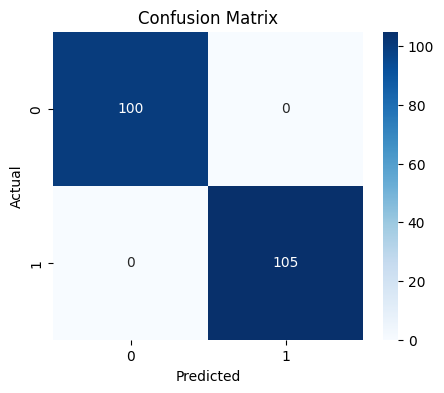

In [65]:
# Step 6: Visualize Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Make Predictions on New Data
### The Data that `YOU` will have to enter to check `Your Heart Condition` !!

In [ ]:
## PLEASE ENTER THE FOLLOWING DATA

age = float(input("Please enter your Age:"))
sex = float(input("Please enter your Gender: (if 'Male' enter '1' & if 'Female' enter '0'):"))
cp = float(input("Chest Pain Type: (if 'typical angina' enter '0', if 'atypical angina' enter '1', if 'non-anginal pain' enter '2', if 'asymptomatic' enter '3')"))
trestbps = float(input("Resting blood pressure (in mm Hg)"))
chol = float(input("Serum cholesterol (in mg/dl)"))
fbs = float(input("if Fasting blood sugar is more than 120 mg/dl enter '1', if Fasting blood sugar is less than 120 mg/dl enter '0'"))
restecg = float(input("Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = probable left ventricular hypertrophy)"))
thalach = float(input("Maximum heart rate achieved"))
exang = float(input("Exercise-induced angina (1 = yes, 0 = no)"))
oldpeak = float(input("ST depression induced by exercise relative to rest"))
slope = float(input("Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)"))
ca = float(input("Number of major vessels (0-3) colored by fluoroscopy"))
thal = float(input("Thalassemia (1 = normal, 3 = fixed defect, 6 = reversible defect)"))


In [ ]:
# EXAMPLE:
# 'age': [45],'sex': [1],'cp': [2],'trestbps': [130],'chol': [230],'fbs': [0],'restecg': [1],'thalach': [150],
# 'exang': [0],'oldpeak': [0.5],'slope': [2],'ca': [0],'thal': [2]

# Output: Your Heart is at Risk, You may have Heart Disease. Take Care.

In [ ]:

new_dataframe = pd.DataFrame({
    'age': [age],
    'sex': [sex],
    'cp': [cp],
    'trestbps': [trestbps],
    'chol': [chol],
    'fbs': [fbs],
    'restecg': [restecg],
    'thalach': [thalach],
    'exang': [exang],
    'oldpeak': [oldpeak],
    'slope': [slope],
    'ca': [ca],
    'thal': [thal]
})

In [56]:
# Scale new data
new_data_scaled = scaler.transform(new_dataframe)
prediction = best_model.predict(new_data_scaled)

print("Your Heart is at Risk, You may have Heart Disease. Take Care." if prediction == 1 else "Congratulations!! No Heart Disease Found. Stay Happy.")

Your Heart is at Risk, You may have Heart Disease. Take Care.


# **Summary**

We downloaded , explored , performed EDA(Exploratory Data Analysis), observed for any missing values and trained few models to search the best model out of it and used that perticular model/algorithm for Heart Disease Prediction.

- Total Dataset contains 1025 rows and 14 columns.
- Performed Exploratory Data Analysis.
- Checked whether there is any Missing value.
- Normalized the entire Data.
- Then split the data into train data and test data.
- Training data had approximately 820 rows and 14 columns.
- Test data had approximately 205 rows and 14 columns.
- Trained the model to perform the required Application of predicting heart disease correctly.
- Trained four models:
`LogisticRegression`,`KNNClassifier` `DecisionTree` and `RandomForest`.
Among these performance of `RandomForest` was best as it gave the accuracy of 100% on the dataset.

# **Now you can check your Heart health too by providing few necessary Informations. 😊**

## **THANK YOU 😊**